In [1]:
# 1. Các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pydlm import dlm, trend, dynamic
import matplotlib.pyplot as plt
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
from sklearn.metrics import mean_squared_log_error as msle

In [2]:
#import dataset
df = pd.read_csv('agr.csv')
df = df[['Price','High']]
df = df.dropna() 
df = df.reset_index(drop=True)
df

,Price,High
0,6062.9,6200.7
1,5885.7,6161.3
2,5895.6,6053.0
3,5807.0,6072.7
4,5698.7,5915.2
...,...,...
1483,16050.0,16150.0
1484,15950.0,16250.0
1485,15800.0,16300.0
1486,15850.0,16100.0


In [3]:
# Split the data into training, testing, and validating sets
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df)) + 1

train_data73 = df[:train_size73]
test_data73 = df[train_size73:train_size73+test_size73]

In [4]:
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data73['Price'], nlags= 700)

In [5]:
# 4. Quá trình training
y_train73 = np.array(train_data73['Price'])

x_train73 = []
for data in train_data73['High']:
  x_train73.append([data])

model73 = dlm(y_train73)
model73 = model73 + trend(1, discount=0.99, name='Trend', w=1e7)
model73 = model73 + dynamic(features=x_train73, discount=1, name='High')
model73 = model73 + autoReg(degree=3, discount=0.99, name='ar', w=1e7)
model73 = model73 + longSeason(period=12, stay=30, data=y_train73, name='season', w=1e7)

model73.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [6]:
# 5. Quá trình testing
x_test73 = []
for data in test_data73['High']:
  x_test73.append([data])

y_test73 = np.array(test_data73['Price'])

y_pred73 = model73.predictN(date = model73.n-1, N=len(x_test73),featureDict={'High': x_test73})
y_pred73 = y_pred73[0]


In [7]:
#  8. Sử dụng linear regression dự báo cột high 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model73 = LinearRegression()

ln_model73.fit(np.array(train_data73.index).reshape(-1,1), train_data73['High'])


# Predict the prices for the next 30 days
last_index73 =  df.index[-1]
last_data73 = pd.RangeIndex(start=last_index73, stop=last_index73+30, step=1)

index_next_30_days73 = np.array(range(last_index73+1, last_index73+31)).reshape(-1, 1)
high_next_30_days73 = ln_model73.predict(index_next_30_days73)

print(high_next_30_days73)


[22237.41743201 22252.66786413 22267.91829625 22283.16872838
 22298.4191605  22313.66959263 22328.92002475 22344.17045688
 22359.420889   22374.67132113 22389.92175325 22405.17218538
 22420.4226175  22435.67304962 22450.92348175 22466.17391387
 22481.424346   22496.67477812 22511.92521025 22527.17564237
 22542.4260745  22557.67650662 22572.92693875 22588.17737087
 22603.42780299 22618.67823512 22633.92866724 22649.17909937
 22664.42953149 22679.67996362]


In [8]:
# 9. Dự báo giá cổ phiếu 30 ngày tiếp theo
x_next_30_days73 = []
for data in high_next_30_days73:
  x_next_30_days73.append([data])

y_next_30_days73 = model73.predictN(N = 30, featureDict={'High': x_next_30_days73})
y_next_30_days73 = y_next_30_days73[0]
print(y_next_30_days73)


[21424.756876570133, 21299.14849095371, 21414.492998088666, 21356.959587663627, 21414.696991411496, 21407.715863523594, 21441.054288850526, 21449.24289951384, 21472.603689337873, 21385.305501600436, 21435.997994854835, 21435.586652198133, 21468.53688145438, 21477.816640729274, 21500.34867628925, 21514.76500661244, 21534.29312269861, 21550.736146668583, 21569.064799670352, 21586.23296937529, 21604.11006909262, 21621.553405988703, 21639.262543946865, 21656.80900742836, 21674.45504592335, 21692.04011454767, 21709.662507480425, 21727.262051211703, 21744.87558361057, 21762.480552185352]


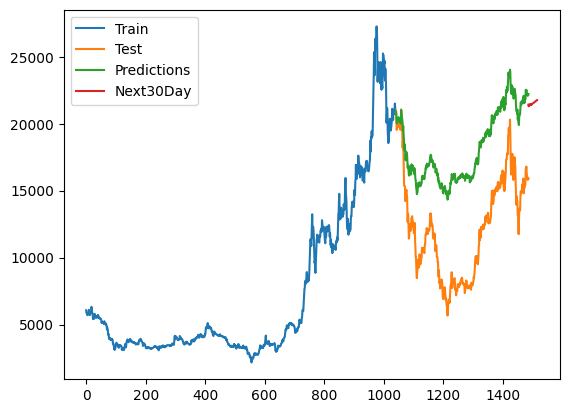

In [9]:
# 10. Vẽ hình
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)
plt.plot(last_data73,y_next_30_days73)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [10]:
# Split the data into training, testing, and validating sets
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df)) 

train_data82 = df[:train_size82]
test_data82 = df[train_size82:train_size82+test_size82]

In [11]:
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data82['Price'], nlags= 700)

In [12]:
# 4. Quá trình training
y_train82 = np.array(train_data82['Price'])

x_train82 = []
for data in train_data82['High']:
  x_train82.append([data])

model82 = dlm(y_train82)
model82 = model82 + trend(1, discount=0.99, name='Trend', w=1e7)
model82 = model82 + dynamic(features=x_train82, discount=1, name='High')
model82 = model82 + autoReg(degree=3, discount=0.99, name='ar', w=1e7)
model82 = model82 + longSeason(period=12, stay=30, data=y_train82, name='season', w=1e7)

model82.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [13]:
# 5. Quá trình testing
x_test82= []
for data in test_data82['High']:
  x_test82.append([data])

y_test82 = np.array(test_data82['Price'])

y_pred82 = model82.predictN(date = model82.n-1, N=len(x_test82),featureDict={'High': x_test82})
y_pred82 = y_pred82[0]


In [14]:
#  8. Sử dụng linear regression dự báo cột high 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model82 = LinearRegression()

ln_model82.fit(np.array(train_data82.index).reshape(-1,1), train_data82['High'])


# Predict the prices for the next 30 days
last_index82 =  df.index[-1]
last_data82 = pd.RangeIndex(start=last_index82, stop=last_index82+30, step=1)

index_next_30_days82 = np.array(range(last_index82+1, last_index82+31)).reshape(-1, 1)
high_next_30_days82 = ln_model82.predict(index_next_30_days82)

print(high_next_30_days82)


[20144.76548302 20158.115712   20171.46594099 20184.81616998
 20198.16639897 20211.51662796 20224.86685694 20238.21708593
 20251.56731492 20264.91754391 20278.26777289 20291.61800188
 20304.96823087 20318.31845986 20331.66868885 20345.01891783
 20358.36914682 20371.71937581 20385.0696048  20398.41983379
 20411.77006277 20425.12029176 20438.47052075 20451.82074974
 20465.17097873 20478.52120771 20491.8714367  20505.22166569
 20518.57189468 20531.92212366]


In [15]:
# 9. Dự báo giá cổ phiếu 30 ngày tiếp theo
x_next_30_days82 = []
for data in high_next_30_days82:
  x_next_30_days82.append([data])

y_next_30_days82 = model82.predictN(N = 30, featureDict={'High': x_next_30_days82})
y_next_30_days82 = y_next_30_days82[0]
print(y_next_30_days82)


[8266.241479366065, 8031.109948997858, 8036.37309993463, 8070.018545928762, 7997.853172049074, 7978.821065978136, 7997.867448586944, 7982.965196121795, 7972.906215434574, 7982.047670337478, 7960.298229896574, 7952.793667867908, 7959.957378229739, 7958.350407613449, 7957.575246621919, 7963.371481852329, 7967.744956121543, 7971.200015019136, 7976.928429646562, 7982.891670624352, 7988.3069910016875, 7994.354140649892, 8000.728491505171, 8006.918350957052, 8013.2421265409885, 8019.742985964446, 8026.210089253903, 8032.693571014291, 8039.249111102634, 8045.810455574849]


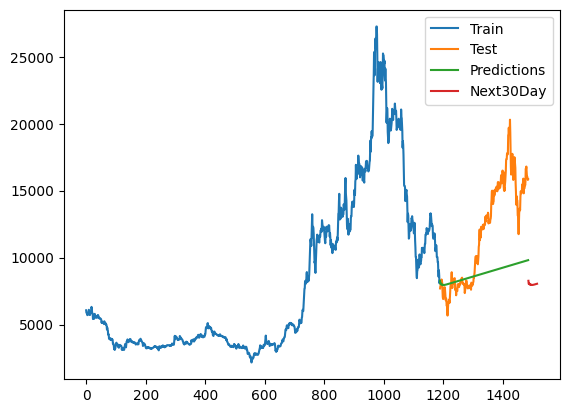

In [16]:
# 10. Vẽ hình
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)
plt.plot(last_data82,y_next_30_days82)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [17]:
# Split the data into training, testing, and validating sets
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df)) 

train_data91 = df[:train_size91]
test_data91 = df[train_size91:train_size91+test_size91]

In [18]:
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data91['Price'], nlags= 700)

In [19]:
# 4. Quá trình training
y_train91 = np.array(train_data91['Price'])

x_train91 = []
for data in train_data91['High']:
  x_train91.append([data])

model91 = dlm(y_train91)
model91 = model91 + trend(1, discount=0.99, name='Trend', w=1e7)
model91 = model91 + dynamic(features=x_train91, discount=1, name='High')
model91 = model91 + autoReg(degree=3, discount=0.99, name='ar', w=1e7)
model91 = model91 + longSeason(period=12, stay=30, data=y_train91, name='season', w=1e7)

model91.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [20]:
# 5. Quá trình testing
x_test91= []
for data in test_data91['High']:
  x_test91.append([data])

y_test91 = np.array(test_data91['Price'])

y_pred91 = model91.predictN(date = model91.n-1, N=len(x_test91),featureDict={'High': x_test91})
y_pred91 = y_pred91[0]


In [21]:
#  8. Sử dụng linear regression dự báo cột high 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model91 = LinearRegression()

ln_model91.fit(np.array(train_data91.index).reshape(-1,1), train_data91['High'])


# Predict the prices for the next 30 days
last_index91 =  df.index[-1]
last_data91 = pd.RangeIndex(start=last_index91, stop=last_index91+30, step=1)

index_next_30_days91 = np.array(range(last_index91+1, last_index91+31)).reshape(-1, 1)
high_next_30_days91 = ln_model91.predict(index_next_30_days91)

print(high_next_30_days91)


[16137.27167927 16146.88125987 16156.49084047 16166.10042107
 16175.71000167 16185.31958227 16194.92916287 16204.53874347
 16214.14832407 16223.75790467 16233.36748527 16242.97706587
 16252.58664647 16262.19622707 16271.80580767 16281.41538827
 16291.02496887 16300.63454947 16310.24413007 16319.85371067
 16329.46329127 16339.07287187 16348.68245247 16358.29203307
 16367.90161367 16377.51119427 16387.12077487 16396.73035547
 16406.33993607 16415.94951667]


In [22]:
# 9. Dự báo giá cổ phiếu 30 ngày tiếp theo
x_next_30_days91 = []
for data in high_next_30_days91:
  x_next_30_days91.append([data])

y_next_30_days91 = model91.predictN(N = 30, featureDict={'High': x_next_30_days91})
y_next_30_days91 = y_next_30_days91[0]
print(y_next_30_days91)


[12403.733284217002, 12403.108650227085, 12457.907242251886, 12465.138976620616, 12474.323770613155, 12491.871062014827, 12500.371094029457, 12509.672545151638, 12520.145702441601, 12528.919869017602, 12537.908962583244, 11893.611485581741, 11904.807311704975, 11882.841117700451, 11766.813550824772, 11775.089572741092, 11772.12554251204, 11757.053515461772, 11765.299206067977, 11770.736402447985, 11774.965107665454, 11783.531019810587, 11791.486314298396, 11799.41700219054, 11808.14954079541, 11816.761067419086, 11825.406147194015, 11834.198949006026, 11842.969622237302, 11851.75376968692]


In [23]:
# 9. Dự báo giá cổ phiếu 30 ngày tiếp theo
x_next_30_days91 = []
for data in high_next_30_days91:
  x_next_30_days91.append([data])

y_next_30_days91 = model91.predictN(N = 30, featureDict={'High': x_next_30_days91})
y_next_30_days91 = y_next_30_days91[0]
print(y_next_30_days91)


[12403.733284217002, 12403.108650227085, 12457.907242251886, 12465.138976620616, 12474.323770613155, 12491.871062014827, 12500.371094029457, 12509.672545151638, 12520.145702441601, 12528.919869017602, 12537.908962583244, 11893.611485581741, 11904.807311704975, 11882.841117700451, 11766.813550824772, 11775.089572741092, 11772.12554251204, 11757.053515461772, 11765.299206067977, 11770.736402447985, 11774.965107665454, 11783.531019810587, 11791.486314298396, 11799.41700219054, 11808.14954079541, 11816.761067419086, 11825.406147194015, 11834.198949006026, 11842.969622237302, 11851.75376968692]


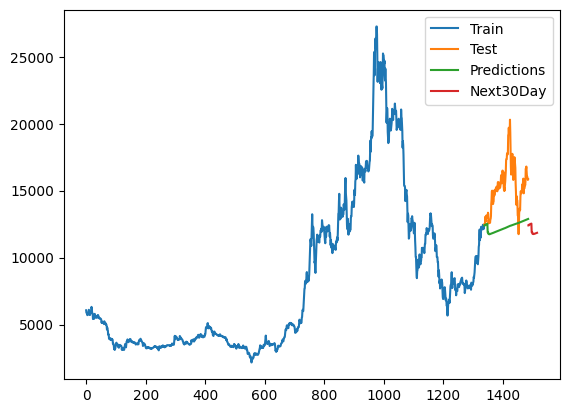

In [24]:
# 10. Vẽ hình
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)
plt.plot(last_data91,y_next_30_days91)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [25]:
#ACCURACY EVALUATION


In [26]:
#method to calculate mape
def calc_mape(actual, predicted):

    # Convert to numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate absolute percentage error
    absolute_error = np.abs((actual - predicted) / actual)
    
    # Handle division by zero cases
    absolute_error[np.isinf(absolute_error)] = 0.0
    
    # Calculate mean absolute percentage error
    mape = np.mean(absolute_error) * 100
    
    return mape

In [27]:
#accuracy evaluate 7:3
from sklearn.metrics import mean_absolute_error as mae

test_rmse73 = np.sqrt(np.mean((y_pred73 - y_test73)**2))
test_mape73 = calc_mape(y_test73, y_pred73)
test_mae73 = mae(y_test73, y_pred73)
test_msle73 = msle(y_test73, y_pred73)

print(test_rmse73)
print(test_mape73)
print(test_mae73)
print(test_msle73)

6227.113899339985
57.126996664366494
5926.252114599472
0.22623106169142243


In [28]:
#accuracy evaluate 8:2
from sklearn.metrics import mean_absolute_error as mae

test_rmse82 = np.sqrt(np.mean((y_pred82 - y_test82)**2))
test_mape82 = calc_mape(y_test82, y_pred82)
test_mae82 = mae(y_test82, y_pred82)
test_msle82 = msle(y_test82, y_pred82)

print(test_rmse82)
print(test_mape82)
print(test_mae82)
print(test_msle82)

4481.688349741627
24.348587142968032
3451.2265468202277
0.13519748594323636


In [29]:
#accuracy evaluate 9:1
from sklearn.metrics import mean_absolute_error as mae

test_rmse91 = np.sqrt(np.mean((y_pred91 - y_test91)**2))
test_mape91 = calc_mape(y_test91, y_pred91)
test_mae91 = mae(y_test91, y_pred91)
test_msle91 = msle(y_test91, y_pred91)

print(test_rmse91)
print(test_mape91)
print(test_mae91)
print(test_msle91)

3452.8158583906975
18.6868163960309
3007.729459158283
0.05726622108301534
